In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS 
import numpy as np
from PIL import Image

In [2]:
# Create airport dataframe
Happiness_df = pd.read_csv('World _Happiness_Report_2005-2021.csv')

# Display sample data
Happiness_df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [3]:
#Renaming columns for simplier future use
Renamed = Happiness_df.rename(columns={"Country name": "Country",
                              "Life Ladder": "Ladder",         
                             "Freedom to make life choices": "Freedom",
                            "Perceptions of corruption": "Corruption",
                            "Confidence in national government": "Government"})
Renamed

,Country,Year,Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom,Generosity,Corruption,Positive affect,Negative affect,Government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...
2084,Zimbabwe,2017,3.638300,8.241609,0.754147,52.150002,0.752826,-0.113937,0.751208,0.733641,0.224051,0.682647
2085,Zimbabwe,2018,3.616480,8.274620,0.775388,52.625000,0.762675,-0.084747,0.844209,0.657524,0.211726,0.550508
2086,Zimbabwe,2019,2.693523,8.196998,0.759162,53.099998,0.631908,-0.081540,0.830652,0.658434,0.235354,0.456455
2087,Zimbabwe,2020,3.159802,8.117733,0.717243,53.575001,0.643303,-0.029376,0.788523,0.660658,0.345736,0.577302


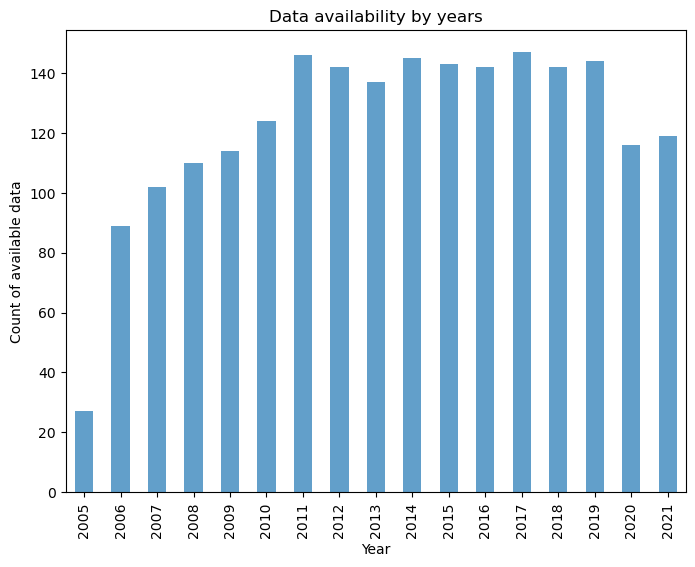

In [4]:
#Yearly summary
yearly = Renamed.groupby(["Year"])["Country"]
yearly_count = yearly.count()
yearly_count.plot(kind="bar", xlabel = "Year", ylabel = "Count of available data", title = "Data availability by years", alpha = 0.7, figsize=(8, 6))
plt.savefig("output/Data_availability_by_years.jpg")
plt.show()

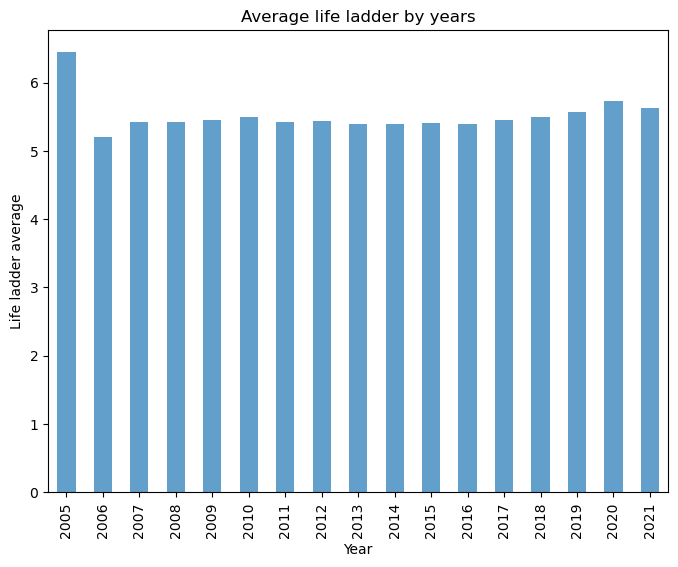

In [5]:
#yearly life ladder summary
happy = Renamed.groupby(["Year"])["Ladder"].mean()
happy.plot(kind="bar", xlabel = "Year", ylabel = "Life ladder average", title = "Average life ladder by years", alpha = 0.7, figsize=(8, 6))
plt.savefig("output/Average_life_ladder_by_years.jpg")
plt.show()

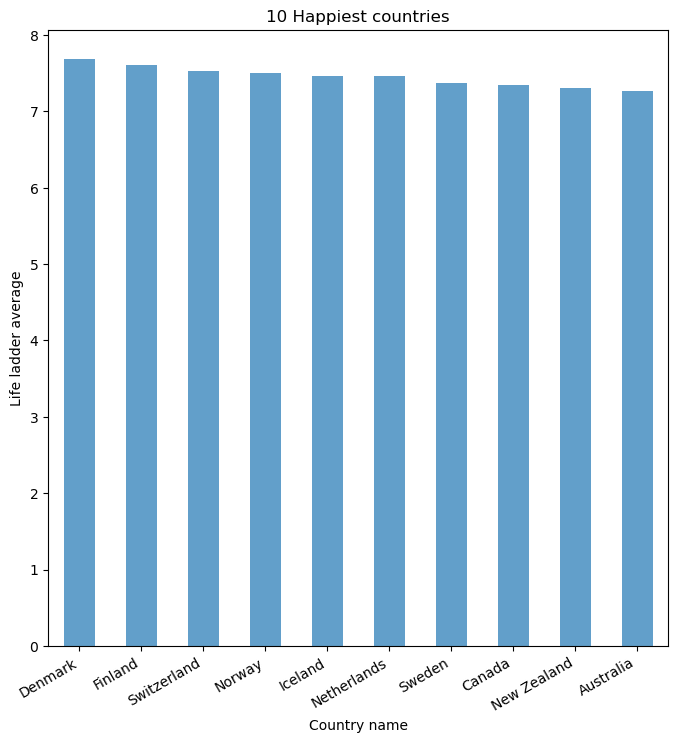

In [6]:
#10 happiest countries
happy_country = Renamed.groupby(["Country"])["Ladder"].mean()
happy_country_sort = happy_country.sort_values(ascending=False).head(10)
happy_country_sort.plot(kind="bar", xlabel = "Country name", ylabel = "Life ladder average", title = "10 Happiest countries", alpha = 0.7, figsize=(8, 8))
plt.xticks(rotation=30, ha='right')
plt.savefig("output/10 Happiest countries.jpg")
plt.show()

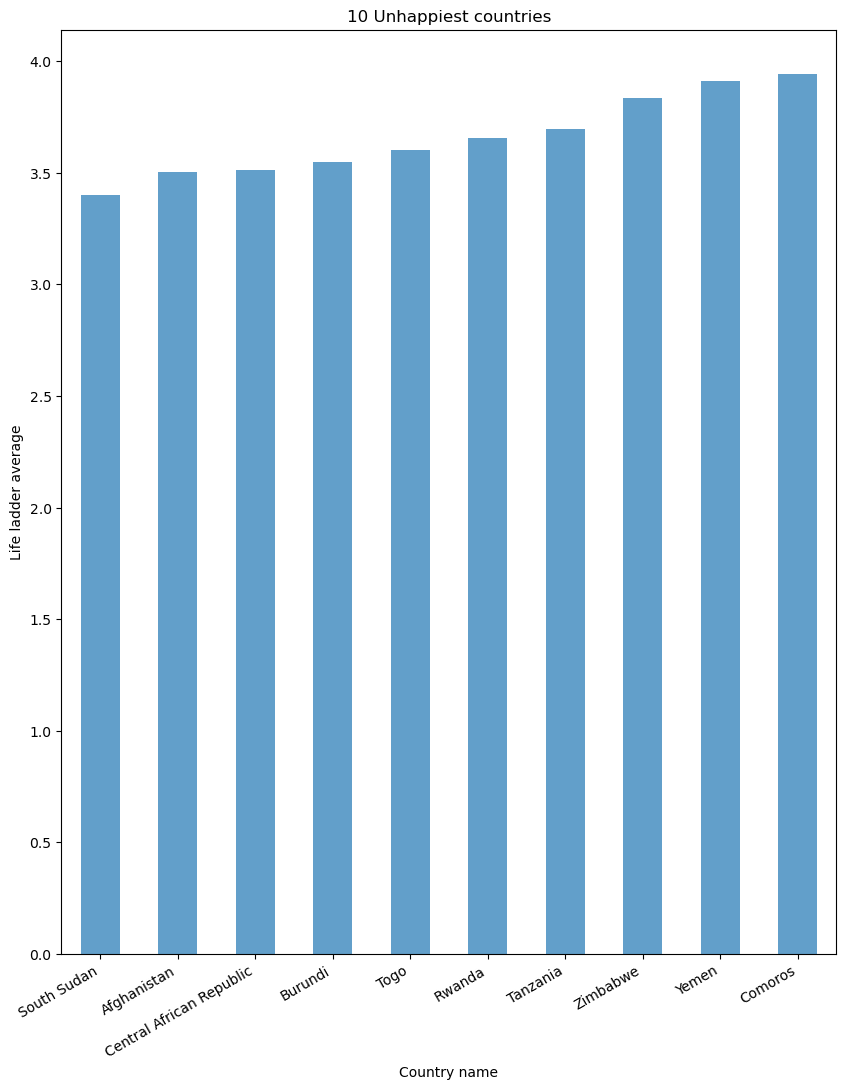

In [7]:
#10 unhappiest countries
unhappy_country = Renamed.groupby(["Country"])["Ladder"].mean()
unhappy_country_sort = unhappy_country.sort_values().head(10)
unhappy_country_sort.plot(kind="bar", xlabel = "Country name", ylabel = "Life ladder average", title = "10 Unhappiest countries", alpha = 0.7, figsize=(10, 12))
plt.xticks(rotation=30, ha='right')
plt.savefig("output/10 Unhappiest countries.jpg")
plt.show()

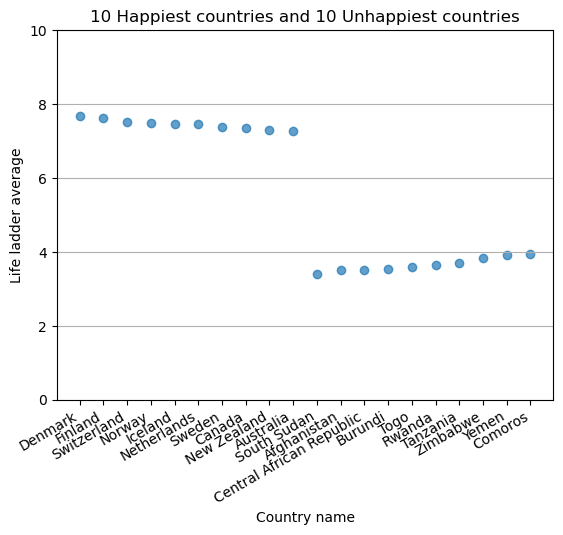

In [8]:
happy_country = Renamed.groupby(["Country"])["Ladder"].mean()
happy_country_sort = happy_country.sort_values(ascending=False).head(10)

unhappy_country = Happiness_df.groupby(["Country name"])["Life Ladder"].mean()
unhappy_country_sort = unhappy_country.sort_values().head(10)

countries_count = pd.concat([happy_country_sort, unhappy_country_sort])


x = countries_count.index
y = countries_count.values
plt.scatter(x, y,  marker= "o", alpha = 0.7)
plt.xlabel('Country name')
plt.ylabel('Life ladder average')
plt.title('10 Happiest countries and 10 Unhappiest countries')
plt.xticks(rotation=30, ha='right')
plt.grid(axis = 'y')
plt.ylim((0,10))
plt.savefig("output/10hap_unhap.jpg",bbox_inches='tight')
plt.show()

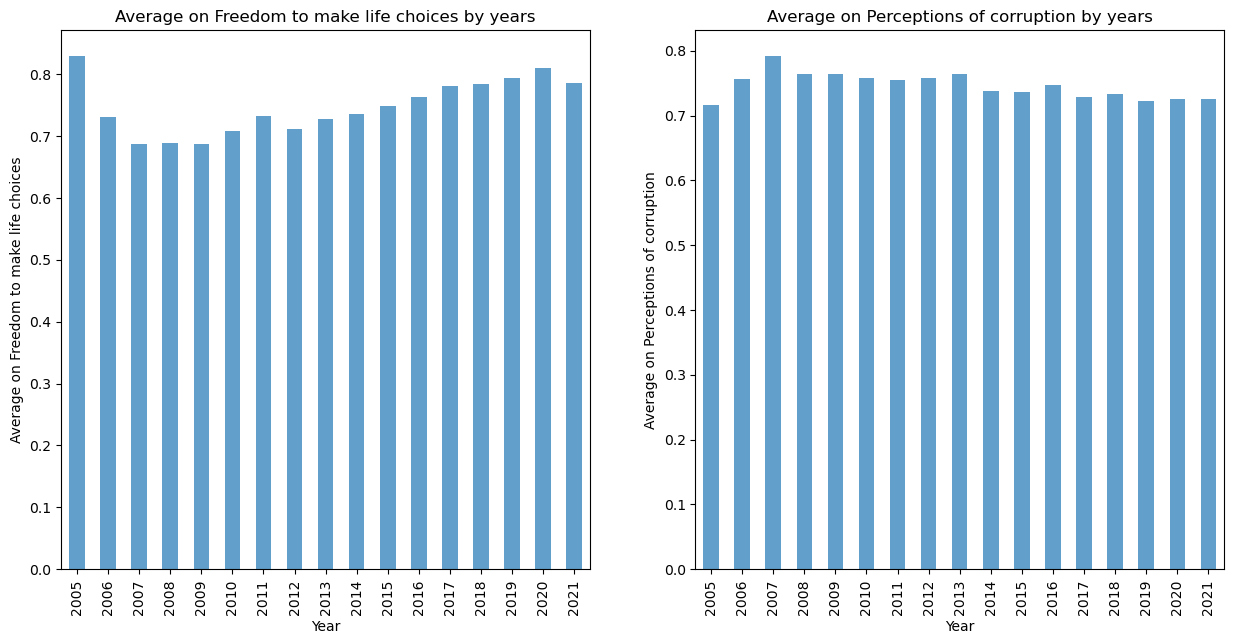

In [9]:
plt.subplots(figsize=(15, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
freedom_yearly = Renamed.groupby(["Year"])["Freedom"].mean()
freedom_yearly.plot(kind="bar", xlabel = "Year", ylabel = "Average on Freedom to make life choices", title = "Average on Freedom to make life choices by years", alpha = 0.7)

plt.subplot(1, 2, 2) # index 2
corruption_yearly = Renamed.groupby(["Year"])["Corruption"].mean()
corruption_yearly.plot(kind="bar", xlabel = "Year", ylabel = "Average on Perceptions of corruption", title = "Average on Perceptions of corruption by years", alpha = 0.7)

plt.savefig("output/Average_yearly.jpg")
plt.show()

In [10]:
# Define a function to create Linear Regression plots and correlation
def lin_reg(x,y, xlab, ylab,sctit, anox, anoy, name):
    x_values = x
    y_values = y
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, alpha=0.5, linewidth = .75)
    plt.grid()
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(anox,anoy),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.title(sctit)
    plt.ylabel(ylab)
    print(f"The r-squared is: {rvalue**2}")
    print(f"The correlation is: {round(st.pearsonr(x_values,y_values)[0],2)}")
    plt.savefig(f"output/correlation_{name}.jpg") 
    plt.show()

In [11]:
#Make a dateframe for correlation
Happiness_choice_gov = Renamed[["Freedom", "Government"]].copy()
Happiness_choice_gov.count()

Freedom       2057
Government    1873
dtype: int64

In [12]:
#Clean data from empty spaces
Happiness_choice_gov_clean = Happiness_choice_gov.dropna(how='any')
Happiness_choice_gov_clean.count()

Freedom       1868
Government    1868
dtype: int64

The r-squared is: 0.15869470322827398
The correlation is: 0.4


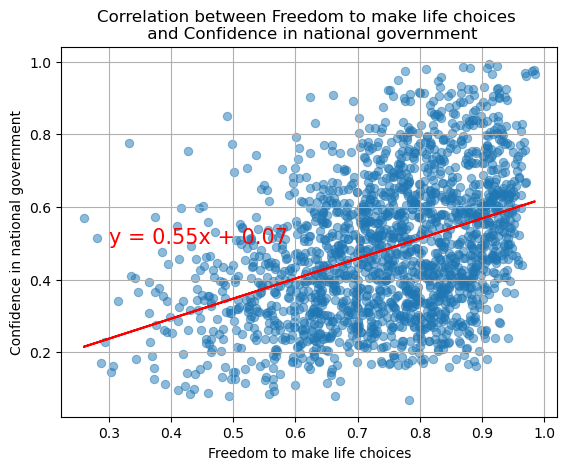

In [13]:
# Linear regression and correlation
lin_reg(Happiness_choice_gov_clean['Freedom'], Happiness_choice_gov_clean['Government'],"Freedom to make life choices", "Confidence in national government", 'Correlation between Freedom to make life choices \n and Confidence in national government', 0.3, 0.5, "Freedom_gov" )

In [14]:
#Make a dateframe for correlation
Happiness_corruption_gov = Renamed[["Corruption", "Government"]].copy()
Happiness_corruption_gov.count()

Corruption    1976
Government    1873
dtype: int64

In [15]:
#Clean data from empty spaces
Happiness_corruption_gov_clean = Happiness_corruption_gov.dropna(how='any')
Happiness_corruption_gov_clean.count()

Corruption    1857
Government    1857
dtype: int64

The r-squared is: 0.21127334308851933
The correlation is: -0.46


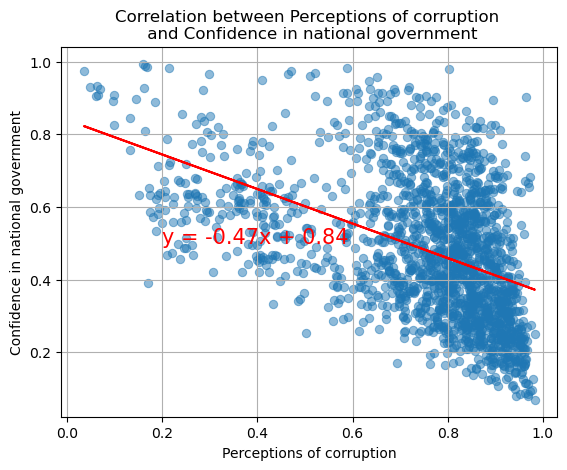

In [16]:
# Linear regression and correlation
lin_reg(Happiness_corruption_gov_clean['Corruption'], Happiness_corruption_gov_clean['Government'],"Perceptions of corruption", "Confidence in national government", 'Correlation between Perceptions of corruption \n and Confidence in national government', 0.2, 0.5, "Perception_gov" )

In [17]:
#deleteduplicates for plot
dup = Renamed.drop_duplicates(["Country"])

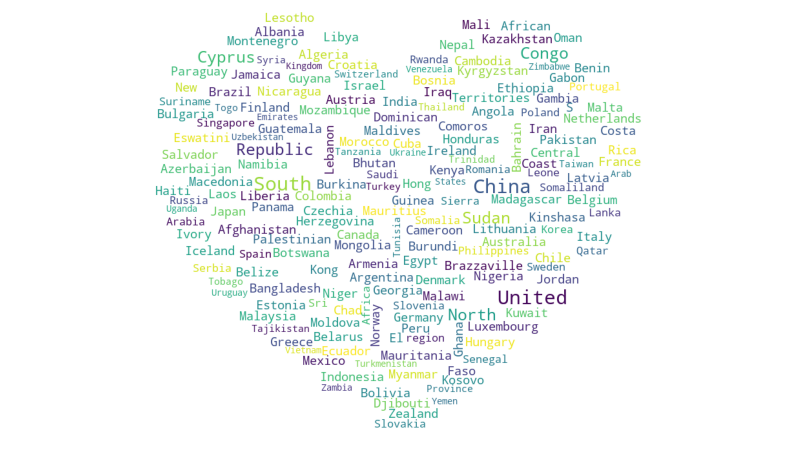

In [18]:
#Creating the text variable
text = " ".join(cat for cat in dup["Country"])
# Import image to np.array
mask = np.array(Image.open("heart-gettyimages-1439973042.jpg"))
# Generate word cloud
word_cloud2 = WordCloud(
    max_font_size=30,
    background_color="White",
    colormap="viridis",
    #collocations=False, 
    stopwords=STOPWORDS,
    mask=mask
).generate (text)
# Display the generated Word Cloud
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(word_cloud2)
plt.axis("off")
plt.savefig('output/heart.jpg')  
plt.show()